In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#The binary classification dataset
ds = pd.read_csv('data.csv')
ds.head()
ds = ds.iloc[:, :-1]

In [3]:
ds = ds.drop(columns=['id'])
ds['diagnosis'] = ds['diagnosis'].map({'M': 1,'B':0})

In [4]:
# Split into features and target
X = ds.drop('diagnosis', axis=1)
y = ds['diagnosis']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trained = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_tested = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_trained,y_train)

LogisticRegression()

In [8]:
y_pred = LR.predict(X_test)

In [9]:
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix, recall_score
print("Precison Score: ", precision_score(y_test,y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Recall Score: ", recall_score(y_test,y_pred))
print("ROC - AOC  Score: ", roc_auc_score(y_test,y_pred))
#tuning threshold 
y_prob = LR.predict_proba(X_tested)[:,1]
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)
print("Threshold:", threshold)
print("Precision:", precision_score(y_test, y_pred_custom))

Precison Score:  0.37719298245614036
Confusion matrix: 
 [[ 0 71]
 [ 0 43]]
Recall Score:  1.0
ROC - AOC  Score:  0.5
Threshold: 0.4
Precision: 0.9767441860465116


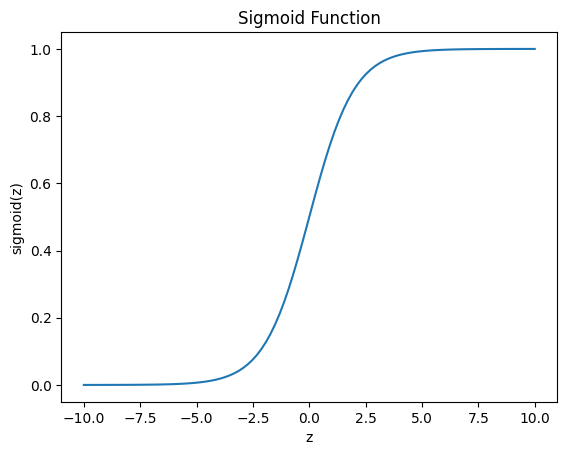

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.show()